In [7]:
import pandas as pd 
import numpy as np
import sklearn
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as LM
from sklearn.utils import shuffle
from sklearn import svm
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2 
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import sys


def buildNetwork(data):
	n=data[0].shape[1]
	reg=l2(1e-4)
	y_train = np.asarray(data[1]).astype(int)

	if data[0].shape[1]>3:
		model = Sequential([
		Input(shape=(n,)),
		Dense(n, activation="relu"),
		Dense(n//2, activation="relu"),
		Dense(1,activation="sigmoid")
		])
		model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
		y_train = np.asarray(data[1])
		model.fit(
	    data[0],
	    y_train,
	    epochs=5)
	else:
		x_train, x_val, y_train, y_val = train_test_split(data[0], y_train, test_size = .20)
		model = Sequential([
		Input(shape=(n,)),
		# Dense(n, activation="relu"),
		Dense(n//2, activation="relu"),
		Dense(1,kernel_regularizer=reg,bias_regularizer=reg,activation="sigmoid")
		])
		model.compile(loss='binary_crossentropy',optimizer = SGD(learning_rate=0.05,momentum=0.05))# optimizer="adam")#, metrics=['accuracy'])
		model.fit(
		x_train,
		y_train,
		batch_size=16,
		epochs=50,
		validation_data=(x_val,y_val),)
	return model


def processData(X,y):
	# X = preprocessing.scale(X)
	X,y = shuffle(X,y)
	x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .20)
	scaler = preprocessing.StandardScaler().fit(x_train)
	x_train=scaler.transform(x_train)
	x_test=scaler.transform(x_test)
	return x_train,x_test, list(y_train), list(y_test)

def buildLR(data):
	model = LM.LinearRegression()
	model.fit(data[0],data[1])
	return model

def buildSVM(data):
	model = svm.SVC()
	model.fit(data[0],data[1])
	return model

def buildRF(data):
	model = RandomForestClassifier()
	model.fit(data[0],data[1])
	return model

def buildGDA(data):
	model = LinearDiscriminantAnalysis()
	model.fit(data[0],data[1])
	return model

def buildKNN(data):
	model = KNeighborsClassifier(n_neighbors=85)
	model.fit(data[0],data[1])
	return model

def getAcc(model,x_test,y_test, str_rep, partial):
	predictions = model.predict(x_test)
	# print(predictions)
	# print(predictions,y_test)
	predictions = [1 if predictions[i]>=.5 else 0 for i in range(len(predictions))]
	# print(y_test,'\n',predictions)
	m=len(y_test)
	acc = sum([1 if y_test[i]==predictions[i] else 0 for i in range(m)])/m
	if partial:
		str_rep="partial "+str_rep
	print("the testing accuracy for {} is {}".format(str_rep,acc))
	return acc

def plotclassifier(model,title,x_test,y_test,partial):
    if partial:
        plot_decision_regions(x_test,np.asarray(y_test).astype(int),clf=model,legend=2)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)
        plt.show()

def runModels(X,y,lists,partial=False):
	x_train,x_test,y_train,y_test = processData(X,y)
	train = (x_train,y_train)
	log_reg = buildLR(train)
	SVM = buildSVM(train)
	RF = buildRF(train)
	GDA = buildGDA(train)
	KNN = buildKNN(train)
	NN = buildNetwork(train)
	lists[0].append(getAcc(log_reg,x_test,y_test,"Logistic Regression", partial))
	lists[1].append(getAcc(SVM, x_test, y_test,"Support Vector Machine", partial))
	lists[2].append(getAcc(NN,x_test,y_test,"Neural Network",partial))
	lists[3].append(getAcc(KNN, x_test, y_test, "K-Nearest Neighbors", partial))
	lists[4].append(getAcc(GDA, x_test, y_test, "Gaussian Discriminant Analysis", partial))
	lists[5].append(getAcc(RF, x_test, y_test,"Random Forest", partial))

	if partial and len(lists[0])==1:
		plotclassifier(log_reg,"Logistic Regression",x_test,y_test,partial)
		plotclassifier(SVM,"Support Vector Machine",x_test,y_test,partial)
		plotclassifier(NN,"Neural Networks",x_test,y_test,partial)
		plotclassifier(KNN,"K-Nearest Neighbors",x_test,y_test,partial)
		plotclassifier(GDA,"Gaussian Discriminant Analysis",x_test,y_test,partial)
		plotclassifier(RF,"Random Forest",x_test,y_test,partial)
	return lists


Epoch 1/5
5/5 [==============================] - 0s 4ms/step - loss: 0.5779 - accuracy: 0.7111
Epoch 2/5
5/5 [==============================] - 0s 4ms/step - loss: 0.3546 - accuracy: 0.9481
Epoch 3/5
5/5 [==============================] - 0s 4ms/step - loss: 0.2277 - accuracy: 0.9778
Epoch 4/5
5/5 [==============================] - 0s 3ms/step - loss: 0.1580 - accuracy: 0.9778
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 0.1178 - accuracy: 0.9778
the testing accuracy for Logistic Regression is 1.0
the testing accuracy for Support Vector Machine is 1.0
the testing accuracy for Neural Network is 1.0
the testing accuracy for K-Nearest Neighbors is 1.0
the testing accuracy for Gaussian Discriminant Analysis is 1.0
the testing accuracy for Random Forest is 1.0
Epoch 1/50
7/7 [==============================] - 0s 17ms/step - loss: 0.8105 - val_loss: 0.7279
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 0.7524 - val_loss: 0.7098
Epoch 3/50
7/7 [=

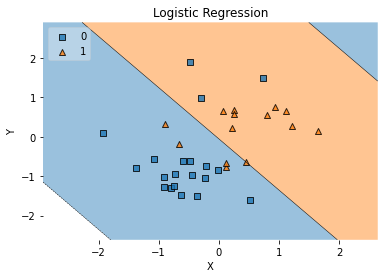

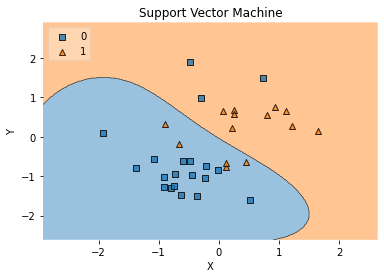

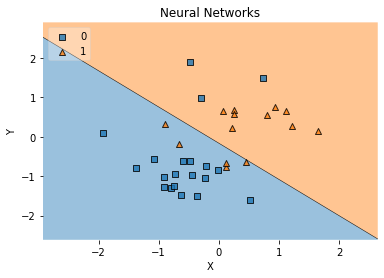

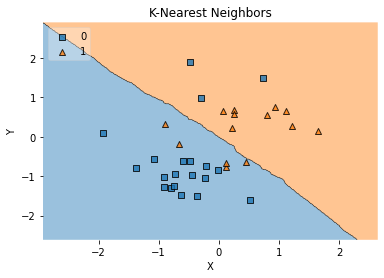

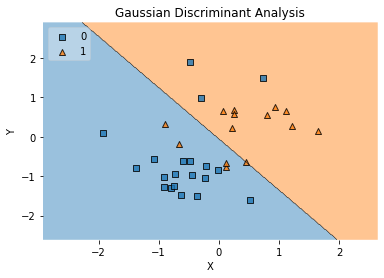

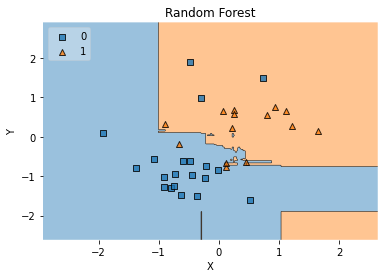

Epoch 1/5
5/5 [==============================] - 0s 3ms/step - loss: 0.3175 - accuracy: 0.9704
Epoch 2/5
5/5 [==============================] - 0s 4ms/step - loss: 0.1884 - accuracy: 0.9852
Epoch 3/5
5/5 [==============================] - 0s 4ms/step - loss: 0.1266 - accuracy: 0.9852
Epoch 4/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0907 - accuracy: 0.9852
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.9852
the testing accuracy for Logistic Regression is 0.9705882352941176
the testing accuracy for Support Vector Machine is 0.9705882352941176
the testing accuracy for Neural Network is 0.9705882352941176
the testing accuracy for K-Nearest Neighbors is 0.9705882352941176
the testing accuracy for Gaussian Discriminant Analysis is 0.9705882352941176
the testing accuracy for Random Forest is 0.9705882352941176
Epoch 1/50
7/7 [==============================] - 0s 16ms/step - loss: 0.6930 - val_loss: 0.6946
Epoch 2/50
7/7 [=======

Epoch 13/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4256 - val_loss: 0.3203
Epoch 14/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4209 - val_loss: 0.3151
Epoch 15/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4161 - val_loss: 0.3100
Epoch 16/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4124 - val_loss: 0.3063
Epoch 17/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4069 - val_loss: 0.3014
Epoch 18/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4028 - val_loss: 0.2967
Epoch 19/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3986 - val_loss: 0.2922
Epoch 20/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3947 - val_loss: 0.2884
Epoch 21/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3909 - val_loss: 0.2847
Epoch 22/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3875 - val_loss: 0.2813
Epoch 23/50
7/7 [=============

Epoch 34/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3127 - val_loss: 0.3607
Epoch 35/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3070 - val_loss: 0.3591
Epoch 36/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3019 - val_loss: 0.3577
Epoch 37/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2968 - val_loss: 0.3566
Epoch 38/50
7/7 [==============================] - 0s 10ms/step - loss: 0.2918 - val_loss: 0.3558
Epoch 39/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2877 - val_loss: 0.3550
Epoch 40/50
7/7 [==============================] - 0s 9ms/step - loss: 0.2833 - val_loss: 0.3543
Epoch 41/50
7/7 [==============================] - 0s 7ms/step - loss: 0.2791 - val_loss: 0.3539
Epoch 42/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2754 - val_loss: 0.3536
Epoch 43/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2716 - val_loss: 0.3534
Epoch 44/50
7/7 [============

the testing accuracy for partial Random Forest is 0.8823529411764706
Epoch 1/5
5/5 [==============================] - 0s 3ms/step - loss: 0.5817 - accuracy: 0.6667
Epoch 2/5
5/5 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.9259
Epoch 3/5
5/5 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9407
Epoch 4/5
5/5 [==============================] - 0s 3ms/step - loss: 0.1442 - accuracy: 0.9556
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 0.9556
the testing accuracy for Logistic Regression is 1.0
the testing accuracy for Support Vector Machine is 1.0
the testing accuracy for Neural Network is 1.0
the testing accuracy for K-Nearest Neighbors is 1.0
the testing accuracy for Gaussian Discriminant Analysis is 1.0
the testing accuracy for Random Forest is 1.0
Epoch 1/50
7/7 [==============================] - 0s 17ms/step - loss: 0.5224 - val_loss: 0.5830
Epoch 2/50
7/7 [============================

7/7 [==============================] - 0s 8ms/step - loss: 0.4013 - val_loss: 0.3794
Epoch 14/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3929 - val_loss: 0.3692
Epoch 15/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3851 - val_loss: 0.3595
Epoch 16/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3782 - val_loss: 0.3504
Epoch 17/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3714 - val_loss: 0.3417
Epoch 18/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3653 - val_loss: 0.3334
Epoch 19/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3595 - val_loss: 0.3257
Epoch 20/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3543 - val_loss: 0.3183
Epoch 21/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3488 - val_loss: 0.3113
Epoch 22/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3441 - val_loss: 0.3045
Epoch 23/50
7/7 [=========================

Epoch 34/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4115 - val_loss: 0.3743
Epoch 35/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4054 - val_loss: 0.3680
Epoch 36/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4001 - val_loss: 0.3620
Epoch 37/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3950 - val_loss: 0.3560
Epoch 38/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3900 - val_loss: 0.3504
Epoch 39/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3860 - val_loss: 0.3456
Epoch 40/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3817 - val_loss: 0.3407
Epoch 41/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3787 - val_loss: 0.3357
Epoch 42/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3742 - val_loss: 0.3311
Epoch 43/50
7/7 [==============================] - 0s 9ms/step - loss: 0.3704 - val_loss: 0.3268
Epoch 44/50
7/7 [=============

Epoch 1/5
5/5 [==============================] - 0s 3ms/step - loss: 0.6143 - accuracy: 0.6519
Epoch 2/5
5/5 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.9333
Epoch 3/5
5/5 [==============================] - 0s 3ms/step - loss: 0.2615 - accuracy: 0.9852
Epoch 4/5
5/5 [==============================] - 0s 3ms/step - loss: 0.1811 - accuracy: 0.9852
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 0.1301 - accuracy: 0.9852
the testing accuracy for Logistic Regression is 0.9705882352941176
the testing accuracy for Support Vector Machine is 0.9705882352941176
the testing accuracy for Neural Network is 0.9705882352941176
the testing accuracy for K-Nearest Neighbors is 0.9705882352941176
the testing accuracy for Gaussian Discriminant Analysis is 0.9705882352941176
the testing accuracy for Random Forest is 0.9705882352941176
Epoch 1/50
7/7 [==============================] - 0s 18ms/step - loss: 0.6935 - val_loss: 0.6973
Epoch 2/50
7/7 [=======

Epoch 13/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3964 - val_loss: 0.4886
Epoch 14/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3896 - val_loss: 0.4830
Epoch 15/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3834 - val_loss: 0.4778
Epoch 16/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3774 - val_loss: 0.4728
Epoch 17/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3722 - val_loss: 0.4681
Epoch 18/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3667 - val_loss: 0.4633
Epoch 19/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3620 - val_loss: 0.4591
Epoch 20/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3575 - val_loss: 0.4554
Epoch 21/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3533 - val_loss: 0.4518
Epoch 22/50
7/7 [==============================] - 0s 8ms/step - loss: 0.3492 - val_loss: 0.4485
Epoch 23/50
7/7 [=============

Epoch 2/5
5/5 [==============================] - 0s 4ms/step - loss: 0.3332 - accuracy: 0.9481
Epoch 3/5
5/5 [==============================] - 0s 3ms/step - loss: 0.2297 - accuracy: 0.9704
Epoch 4/5
5/5 [==============================] - 0s 3ms/step - loss: 0.1722 - accuracy: 0.9778
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 0.1376 - accuracy: 0.9778
the testing accuracy for Logistic Regression is 1.0
the testing accuracy for Support Vector Machine is 1.0
the testing accuracy for Neural Network is 0.9705882352941176
the testing accuracy for K-Nearest Neighbors is 1.0
the testing accuracy for Gaussian Discriminant Analysis is 1.0
the testing accuracy for Random Forest is 1.0
Epoch 1/50
7/7 [==============================] - 0s 19ms/step - loss: 0.5484 - val_loss: 0.6253
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 0.5236 - val_loss: 0.6143
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 0.5046 - val_loss: 0.6041
E

7/7 [==============================] - 0s 9ms/step - loss: 0.6938 - val_loss: 0.6962
Epoch 38/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6933 - val_loss: 0.6961
Epoch 39/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6935 - val_loss: 0.6958
Epoch 40/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6932 - val_loss: 0.6958
Epoch 41/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6935 - val_loss: 0.6959
Epoch 42/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6937 - val_loss: 0.6958
Epoch 43/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6938 - val_loss: 0.6956
Epoch 44/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6938 - val_loss: 0.6955
Epoch 45/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6933 - val_loss: 0.6956
Epoch 46/50
7/7 [==============================] - 0s 11ms/step - loss: 0.6940 - val_loss: 0.6958
Epoch 47/50
7/7 [==================

7/7 [==============================] - 0s 7ms/step - loss: 0.6478 - val_loss: 0.6487
Epoch 16/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6402 - val_loss: 0.6413
Epoch 17/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6315 - val_loss: 0.6336
Epoch 18/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6222 - val_loss: 0.6244
Epoch 19/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6116 - val_loss: 0.6143
Epoch 20/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6001 - val_loss: 0.6034
Epoch 21/50
7/7 [==============================] - 0s 7ms/step - loss: 0.5882 - val_loss: 0.5918
Epoch 22/50
7/7 [==============================] - 0s 6ms/step - loss: 0.5754 - val_loss: 0.5802
Epoch 23/50
7/7 [==============================] - 0s 7ms/step - loss: 0.5613 - val_loss: 0.5677
Epoch 24/50
7/7 [==============================] - 0s 7ms/step - loss: 0.5470 - val_loss: 0.5553
Epoch 25/50
7/7 [=========================

5/5 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.9778
Epoch 4/5
5/5 [==============================] - 0s 3ms/step - loss: 0.2318 - accuracy: 0.9852
Epoch 5/5
5/5 [==============================] - 0s 3ms/step - loss: 0.1651 - accuracy: 0.9852
the testing accuracy for Logistic Regression is 0.9705882352941176
the testing accuracy for Support Vector Machine is 0.9705882352941176
the testing accuracy for Neural Network is 0.9411764705882353
the testing accuracy for K-Nearest Neighbors is 0.9705882352941176
the testing accuracy for Gaussian Discriminant Analysis is 0.9705882352941176
the testing accuracy for Random Forest is 0.9705882352941176
Epoch 1/50
7/7 [==============================] - 0s 18ms/step - loss: 0.6209 - val_loss: 0.5817
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6029 - val_loss: 0.5569
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.5838 - val_loss: 0.5334
Epoch 4/50
7/7 [===============

Epoch 15/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4983 - val_loss: 0.4808
Epoch 16/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4851 - val_loss: 0.4669
Epoch 17/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4737 - val_loss: 0.4540
Epoch 18/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4629 - val_loss: 0.4419
Epoch 19/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4534 - val_loss: 0.4304
Epoch 20/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4444 - val_loss: 0.4195
Epoch 21/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4356 - val_loss: 0.4091
Epoch 22/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4274 - val_loss: 0.3991
Epoch 23/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4200 - val_loss: 0.3898
Epoch 24/50
7/7 [==============================] - 0s 7ms/step - loss: 0.4134 - val_loss: 0.3808
Epoch 25/50
7/7 [=============

Epoch 36/50
7/7 [==============================] - 0s 9ms/step - loss: 0.2987 - val_loss: 0.4056
Epoch 37/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2956 - val_loss: 0.4045
Epoch 38/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2925 - val_loss: 0.4034
Epoch 39/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2898 - val_loss: 0.4022
Epoch 40/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2870 - val_loss: 0.4013
Epoch 41/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2842 - val_loss: 0.4004
Epoch 42/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2819 - val_loss: 0.3997
Epoch 43/50
7/7 [==============================] - 0s 7ms/step - loss: 0.2794 - val_loss: 0.3991
Epoch 44/50
7/7 [==============================] - 0s 8ms/step - loss: 0.2771 - val_loss: 0.3985
Epoch 45/50
7/7 [==============================] - 0s 9ms/step - loss: 0.2748 - val_loss: 0.3979
Epoch 46/50
7/7 [=============

In [8]:
data = pd.read_csv("Option1_data.csv")
X=data.iloc[:,:-1]
y = data.iloc[:,-1]
X_partial = data.iloc[:,:2]

# runModels(X,y)
# runModels(X_partial,y,partial=True)
names=["Logistic Regression","SVM","Random Forest", "GDA", "KNN", "Neural Network"]
lists=[[],[],[],[],[],[]]
lists_partial=[[],[],[],[],[],[]]
for i in range(25):
	lists=runModels(X,y,lists)
	lists_partial=runModels(X_partial,y,lists_partial,partial=True)

print("Full Feature Set:\n")
for i in range(len(lists)):
	print(names[i]+":\n")
	avg = round(np.mean(lists[i]),2)
	std = round(np.std(lists[i],ddof=1),2)
	print("average: "+str(avg))
	print("standard deviation: "+str(std)+"\n\n")

print("\n\n\nPartial Feature Set:\n")
for i in range(len(lists_partial)):
	print(names[i]+":\n")
	avg = round(np.mean(lists_partial[i]),2)
	std = round(np.std(lists_partial[i],ddof=1),2)
	print("average: "+str(avg))
	print("standard deviation: "+str(std)+"\n\n")